In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from tqdm import tqdm
from skimage.draw import circle
import json
from skimage.io import imread

### Problem
This notebook is aimed at investigating into UchiyaMarkers coordinate system

It loads .txt file and tries to reproduce the resulting .jpg marker

In [2]:
# configuration
imsize = 600
txt_filename = '0.txt'
jpg_filename = '0.jpg'

In [3]:
# loading marker file
points = []
with open(txt_filename, 'r') as f:
    f_array = f.read().split('\n')
    n_lines = int(f_array[0])
    print('Detected %d lines' % n_lines)
    for i in tqdm(range(n_lines)):
        points.append(list(map(int, f_array[i + 1].split())))
    assert(len(points) == n_lines)

100%|██████████| 40/40 [00:00<00:00, 30654.51it/s]

Detected 40 lines


In [4]:
# get image of dots from their coordinates
def draw_dots(points):
    # creating empty image
    img = np.zeros((imsize, imsize))

    # helper for drawing circles on img
    def draw_circle(x, y, r = 5, image = img):
        rr, cc = circle(x, y, r)
        img[rr, cc] = 1

    # drawing points from the .txt file
    # transformation: y -> imsize - 1 - y
    # (mirror y axis)
    [draw_circle(x, imsize - 1 - y) for x, y in points]

    # reference point
    # this point should be centered left-right, and at the top
    draw_circle(300, 15, 10)
    
    return img

In [5]:
def compare(points, filename):
    # draw dots
    img = draw_dots(points)
    # creating 1x2 subplots object
    _, (ax1, ax2) = plt.subplots(figsize=(8, 3), ncols=2)

    # transposing since want coordinate system like in Cellulo
    # x: right
    # y: down
    # origin: top-left
    ax1.imshow(1 - img.T, cmap='gray', interpolation='gaussian')
    ax1.set_title('Created')

    # loading Uchiya .jpg image
    ax2.imshow(imread(filename))
    ax2.set_title('Original')

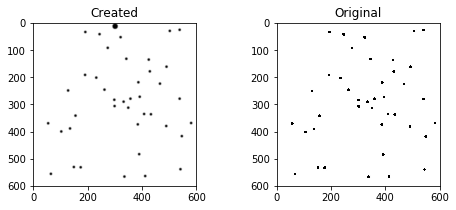

In [6]:
compare(points, jpg_filename)

### Result
The coordinate system of **UchiyaMarkers** is:

``x: right
y: up
origin: bottom-left``

**Cellulo** coordinate system:

``x: right
y: down
origin: top-left``

Transformation: flip y axis:
$$y_{c}=y_{max}-1-y_{u}$$

## SVG file

In [7]:
dots = json.load(open('drawing.svg.markers.json', 'r'))['markers'][0]['dots_uchiya']
dots = [[float(dot[t]) for t in ['x', 'y']] for dot in dots]

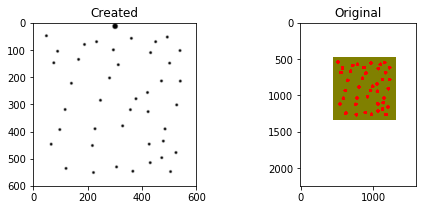

In [8]:
compare(dots, 'drawing.svg.png')